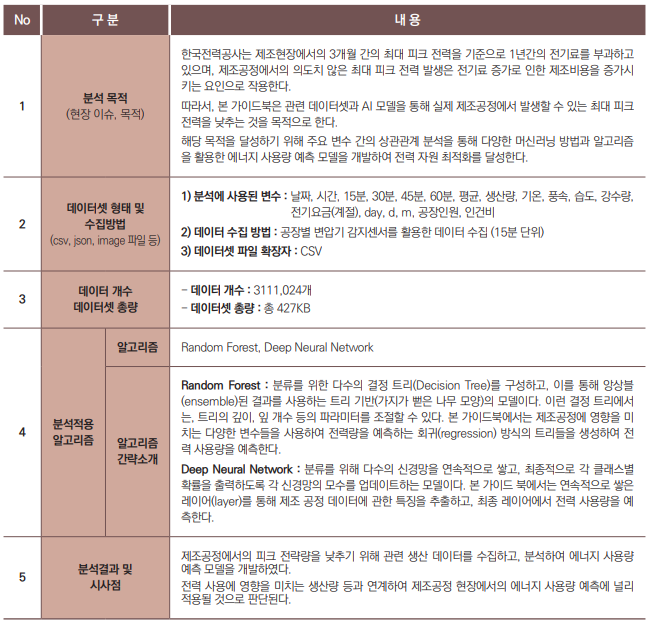

In [133]:
from IPython.display import Image
Image("https://raw.githubusercontent.com/bigdataleeky/python/main/image/%EC%9E%90%EC%9B%90%EC%B5%9C%EC%A0%81%ED%99%94%EC%9A%94%EC%95%BD%EB%B3%B4%EA%B3%A0%EC%84%9C.PNG", width=500)

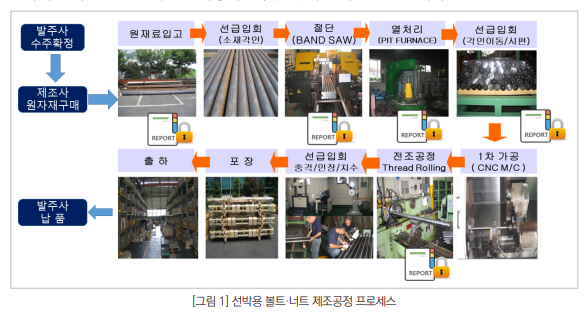

In [134]:
Image("https://raw.githubusercontent.com/bigdataleeky/python/main/image/%EC%9E%90%EC%9B%90%EC%B5%9C%EC%A0%81%ED%99%94%EC%9A%94%EC%95%BD%EB%B3%B4%EA%B3%A0%EC%84%9C2.PNG", width=500)

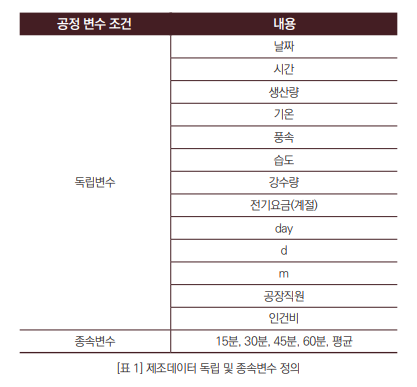

In [135]:
Image("https://raw.githubusercontent.com/bigdataleeky/python/main/image/%EC%9E%90%EC%9B%90%EC%B5%9C%EC%A0%81%ED%99%94%EC%9A%94%EC%95%BD%EB%B3%B4%EA%B3%A0%EC%84%9C3.PNG", width=300)

In [136]:
# 데이터 분석
# 최대수요전력에서 영향을 미치는 다양한 변수들의 상관관계를 분석해서 쵀대수요전력에 영향을 미치는 변수를 선정
#한 후  시간대별 최대수요전역을 예측할수 있는 모델을 제공

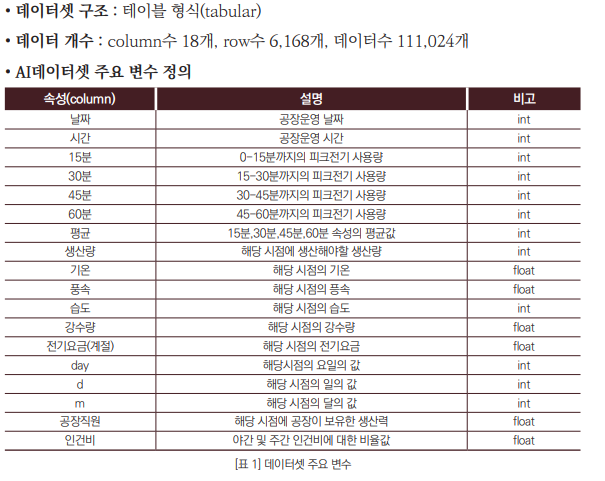

In [137]:
Image("https://raw.githubusercontent.com/bigdataleeky/python/main/image/%EC%9E%90%EC%9B%90%EC%B5%9C%EC%A0%81%ED%99%94%EC%9A%94%EC%95%BD%EB%B3%B4%EA%B3%A0%EC%84%9C4.PNG", width=400)

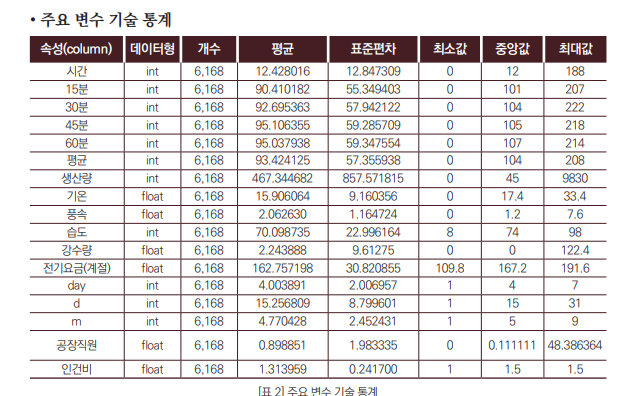

In [138]:
Image("https://raw.githubusercontent.com/bigdataleeky/python/main/image/%EC%9E%90%EC%9B%90%EC%B5%9C%EC%A0%81%ED%99%94%EC%9A%94%EC%95%BD%EB%B3%B4%EA%B3%A0%EC%84%9C5.PNG", width=400)

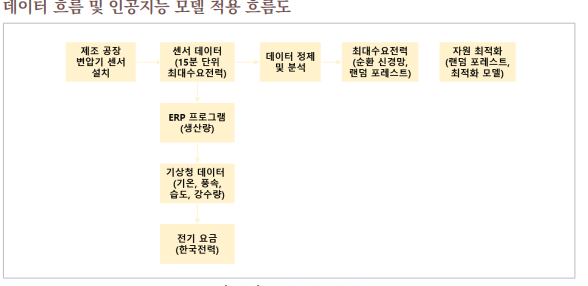

In [139]:
Image("https://raw.githubusercontent.com/bigdataleeky/python/main/image/%EC%9E%90%EC%9B%90%EC%B5%9C%EC%A0%81%ED%99%94%EC%9A%94%EC%95%BD%EB%B3%B4%EA%B3%A0%EC%84%9C6.PNG", width=400)

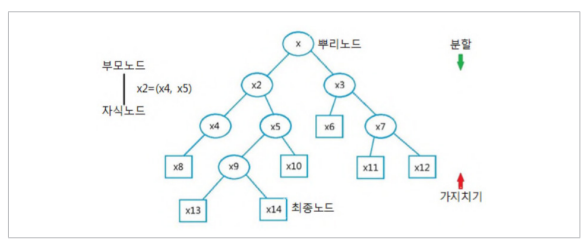

In [140]:
Image("https://raw.githubusercontent.com/bigdataleeky/python/main/image/%EC%9E%90%EC%9B%90%EC%B5%9C%EC%A0%81%ED%99%94%EC%9A%94%EC%95%BD%EB%B3%B4%EA%B3%A0%EC%84%9C7.PNG", width=400)
# 의사결정 나무의 구조

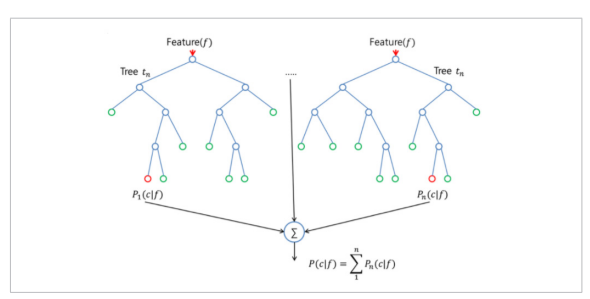

In [141]:
Image("https://raw.githubusercontent.com/bigdataleeky/python/main/image/%EC%9E%90%EC%9B%90%EC%B5%9C%EC%A0%81%ED%99%94%EC%9A%94%EC%95%BD%EB%B3%B4%EA%B3%A0%EC%84%9C8.PNG", width=400)
#랜덤 포레스트 앙상블 머신러닝구조

In [142]:
# 필요한 라이브러리 로드
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from datetime import datetime
import seaborn as sns

In [143]:
df = pd.read_csv('https://raw.githubusercontent.com/bigdataleeky/python/main/data/okm_2021.csv')

In [144]:
df.head()

,날짜,시간,15분,30분,45분,60분,평균,생산량,기온,풍속,습도,강수량,전기요금(계절),day,d,m,공장인원,인건비
0,20210101,0,62,61,61,61,61,0,-3.2,2.4,71,0.0,109.8,5,1,1,0.0,1.5
1,20210101,1,96,93,116,113,105,0,-4.5,1.5,77,0.0,109.8,5,1,1,0.0,1.5
2,20210101,2,106,96,106,107,104,0,-3.9,2.6,58,0.0,109.8,5,1,1,0.0,1.5
3,20210101,3,92,110,110,109,105,0,-4.1,2.6,56,0.0,109.8,5,1,1,0.0,1.5
4,20210101,4,108,105,106,108,107,0,-4.6,2.6,60,0.0,109.8,5,1,1,0.0,1.5


In [145]:
df.tail()

,날짜,시간,15분,30분,45분,60분,평균,생산량,기온,풍속,습도,강수량,전기요금(계절),day,d,m,공장인원,인건비
6163,20210914,19,152,151,171,139,153,1497,21.7,3.6,85,9.4,167.2,2,14,9,2.442088,1.5
6164,20210914,20,124,130,128,130,128,45,22.2,4.2,78,9.4,167.2,2,14,9,0.087891,1.5
6165,20210914,21,134,130,125,124,128,149,22.2,4.3,76,9.4,167.2,2,14,9,0.290448,1.5
6166,20210914,22,100,109,120,114,111,66,22.0,2.5,79,9.4,167.2,2,14,9,0.148984,1.5
6167,20210914,23,117,119,112,91,110,405,22.0,2.5,79,9.4,167.2,2,14,9,0.922551,1.5


In [146]:
# 데이터의 구조 및 타입 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6168 entries, 0 to 6167
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   날짜        6168 non-null   int64  
 1   시간        6168 non-null   int64  
 2   15분       6168 non-null   int64  
 3   30분       6168 non-null   int64  
 4   45분       6168 non-null   int64  
 5   60분       6168 non-null   int64  
 6   평균        6168 non-null   int64  
 7   생산량       6168 non-null   int64  
 8   기온        6168 non-null   float64
 9   풍속        6165 non-null   float64
 10  습도        6168 non-null   int64  
 11  강수량       6167 non-null   float64
 12  전기요금(계절)  6168 non-null   float64
 13  day       6168 non-null   int64  
 14  d         6168 non-null   int64  
 15  m         6168 non-null   int64  
 16  공장인원      6151 non-null   float64
 17  인건비       6168 non-null   float64
dtypes: float64(6), int64(12)
memory usage: 867.5 KB


In [147]:
# 데이터 정제(전처리)
# 1. 결측치 처리
# df.isnull()
df.isnull().sum()

날짜           0
시간           0
15분          0
30분          0
45분          0
60분          0
평균           0
생산량          0
기온           0
풍속           3
습도           0
강수량          1
전기요금(계절)     0
day          0
d            0
m            0
공장인원        17
인건비          0
dtype: int64

In [148]:
df[df['강수량'].isnull()]

,날짜,시간,15분,30분,45분,60분,평균,생산량,기온,풍속,습도,강수량,전기요금(계절),day,d,m,공장인원,인건비
552,20210124,0,73,70,69,69,70,0,9.8,3.9,66,NaN,109.8,7,24,1,0.0,1.5


In [149]:
index = df[df['강수량'].isnull()].index[0]
# 1. N A를 0으로 채우는 방법
# df['강수량'].fillna(0,inplace=True)

# 2. 해당 row를 제거하는 방법
# df.drop(index=552,inplace=True)

# 3. 시간대별 강수량을 비교해 보니... 비가그친것을 확인했고.. 그래서.. 평균을. 적용
# df[545:555]
df.loc[index,'강수량'] = 3.0

In [150]:
df.isnull().sum()

날짜           0
시간           0
15분          0
30분          0
45분          0
60분          0
평균           0
생산량          0
기온           0
풍속           3
습도           0
강수량          0
전기요금(계절)     0
day          0
d            0
m            0
공장인원        17
인건비          0
dtype: int64

In [151]:
df.fillna(0, inplace=True)
df.isnull().sum()

날짜          0
시간          0
15분         0
30분         0
45분         0
60분         0
평균          0
생산량         0
기온          0
풍속          0
습도          0
강수량         0
전기요금(계절)    0
day         0
d           0
m           0
공장인원        0
인건비         0
dtype: int64

In [152]:
# 데이터의 특성 파악
df.describe()

,날짜,시간,15분,30분,45분,60분,평균,생산량,기온,풍속,습도,강수량,전기요금(계절),day,d,m,공장인원,인건비
count,6.168000e+03,6168.000000,6168.000000,6168.000000,6168.000000,6168.000000,6168.000000,6168.000000,6168.000000,6168.000000,6168.000000,6168.000000,6168.000000,6168.000000,6168.000000,6168.000000,6168.000000,6168.000000
mean,2.021049e+07,12.428016,90.410182,92.695363,95.106355,95.037938,93.424125,467.344682,15.906064,2.062630,70.098735,2.244374,162.757198,4.003891,15.256809,4.770428,0.898851,1.313959
std,2.447756e+02,12.847309,55.349403,57.942122,59.285709,59.347554,57.355938,857.571815,9.160356,1.164724,22.996164,9.612716,30.820855,2.006957,8.799601,2.452431,1.983335,0.241700
min,2.021010e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-12.000000,0.000000,8.000000,0.000000,109.800000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,2.021031e+07,6.000000,23.000000,23.000000,23.000000,23.000000,23.000000,0.000000,9.600000,1.200000,53.000000,0.000000,167.200000,2.000000,8.000000,3.000000,0.000000,1.000000
50%,2.021051e+07,12.000000,101.000000,104.000000,105.000000,107.000000,104.000000,45.000000,17.400000,1.900000,74.000000,0.000000,167.200000,4.000000,15.000000,5.000000,0.111111,1.500000
75%,2.021071e+07,18.000000,133.000000,143.000000,149.000000,149.000000,144.000000,637.250000,23.300000,2.800000,91.000000,0.100000,191.600000,6.000000,23.000000,7.000000,1.160310,1.500000
max,2.021091e+07,188.000000,207.000000,222.000000,218.000000,214.000000,208.000000,9830.000000,33.400000,7.600000,98.000000,122.400000,191.600000,7.000000,31.000000,9.000000,48.386364,1.500000


C:\Miniconda3\envs\ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='생산량'>

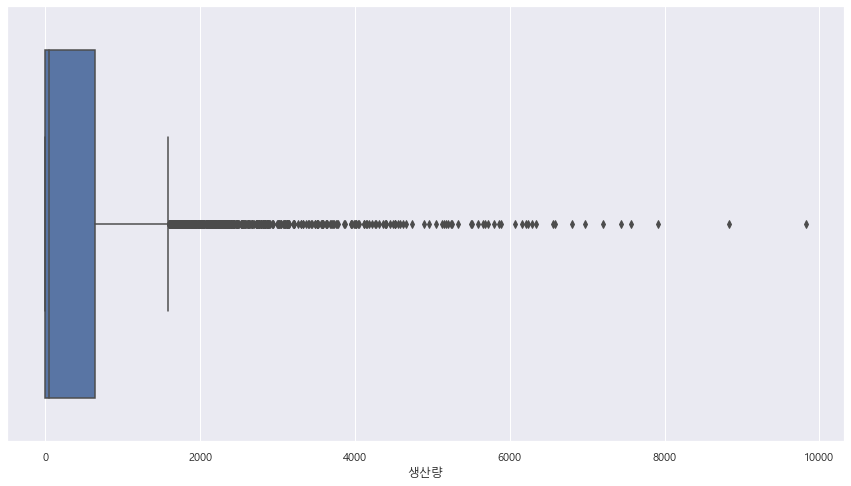

In [153]:
# cols = df.columns[6:12]
# [i for i in cols]
# df.boxplot(column=['생산량'])
sns.boxplot(df['생산량'])

In [154]:
df['생산량']

0          0
1          0
2          0
3          0
4          0
        ... 
6163    1497
6164      45
6165     149
6166      66
6167     405
Name: 생산량, Length: 6168, dtype: int64

In [155]:
# 상관관계  corr()

df.corr()

,날짜,시간,15분,30분,45분,60분,평균,생산량,기온,풍속,습도,강수량,전기요금(계절),day,d,m,공장인원,인건비
날짜,1.000000,0.065435,0.035555,0.034746,0.037285,0.036244,0.036572,0.070719,0.863028,-0.268152,0.548722,0.160779,0.835836,-0.011838,-0.035210,0.999357,-0.002136,0.005469
시간,0.065435,1.000000,0.130084,0.124554,0.115947,0.097021,0.117865,0.031816,0.150262,0.009283,-0.030201,0.049108,0.067609,-0.036188,-0.010330,0.065681,0.012563,-0.034275
15분,0.035555,0.130084,1.000000,0.980295,0.966859,0.950034,0.984688,0.520424,0.050760,0.115215,-0.085205,-0.008257,0.055881,-0.428312,0.052554,0.033601,0.295909,-0.202557
30분,0.034746,0.124554,0.980295,1.000000,0.982443,0.959004,0.991255,0.515841,0.049524,0.114173,-0.084102,-0.010430,0.056203,-0.426674,0.055754,0.032679,0.288622,-0.195760
45분,0.037285,0.115947,0.966859,0.982443,1.000000,0.984789,0.994774,0.513789,0.052818,0.115768,-0.082522,-0.013158,0.059044,-0.432957,0.056047,0.035203,0.286091,-0.211635
60분,0.036244,0.097021,0.950034,0.959004,0.984789,1.000000,0.984828,0.499723,0.055651,0.128605,-0.090875,-0.014834,0.057878,-0.437576,0.056354,0.034153,0.276778,-0.243434
평균,0.036572,0.117865,0.984688,0.991255,0.994774,0.984828,1.000000,0.517948,0.052996,0.119837,-0.086508,-0.011780,0.058096,-0.436280,0.055824,0.034499,0.289860,-0.215982
생산량,0.070719,0.031816,0.520424,0.515841,0.513789,0.499723,0.517948,1.000000,0.117780,0.115691,-0.109503,0.008143,0.068930,-0.259129,0.044836,0.068976,0.785115,-0.280625
기온,0.863028,0.150262,0.050760,0.049524,0.052818,0.055651,0.052996,0.117780,1.000000,-0.192121,0.401553,0.118491,0.809825,0.010130,0.108487,0.857490,0.030540,-0.184611
풍속,-0.268152,0.009283,0.115215,0.114173,0.115768,0.128605,0.119837,0.115691,-0.192121,1.000000,-0.440112,0.048492,-0.254750,0.004037,-0.010588,-0.267261,0.088944,-0.350115


<AxesSubplot:>

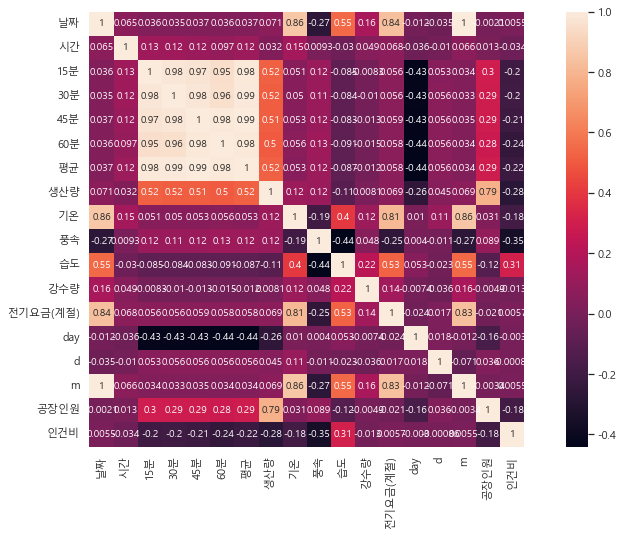

In [156]:
# 상관관계 시각화
# 한글처리
plt.rc("font",family='Malgun Gothic')
sns.set(font = 'Malgun Gothic',
        rc={'axes.unicode_minus':False,'figure.figsize':(15,8)}, style='darkgrid'
       )
sns.heatmap(df.corr(),vmax=1,square=True,annot=True,annot_kws={'size':10})

In [157]:
#15,30, 45, 60분의 시간의 흐름에 따른 최대 수요전력들의 상관관계가 가장 높음

In [167]:
# 상관관계가 높은 column들을 가지고 데이터를 정제
# 날자 15 30 45 60 평균
# df.drop(columns=['','',''])
print(df.head())
temp1 = df.iloc[:,2:7]
# temp2 = df.iloc[:,0]
# df2 = pd.concat([temp2,temp1],axis=1)
# df2.head()
df2 = temp1
df2.head()

         날짜  시간  15분  30분  45분  60분   평균  생산량   기온   풍속  습도  강수량  전기요금(계절)  \
0  20210101   0   62   61   61   61   61    0 -3.2  2.4  71  0.0     109.8   
1  20210101   1   96   93  116  113  105    0 -4.5  1.5  77  0.0     109.8   
2  20210101   2  106   96  106  107  104    0 -3.9  2.6  58  0.0     109.8   
3  20210101   3   92  110  110  109  105    0 -4.1  2.6  56  0.0     109.8   
4  20210101   4  108  105  106  108  107    0 -4.6  2.6  60  0.0     109.8   

   day  d  m  공장인원  인건비  
0    5  1  1   0.0  1.5  
1    5  1  1   0.0  1.5  
2    5  1  1   0.0  1.5  
3    5  1  1   0.0  1.5  
4    5  1  1   0.0  1.5  


,15분,30분,45분,60분,평균
0,62,61,61,61,61
1,96,93,116,113,105
2,106,96,106,107,104
3,92,110,110,109,105
4,108,105,106,108,107


In [159]:
# 시계열 데이터에서는 향후에 시각화나 학습을 위해서는 인덱스를 날자로 하는게 유리
# 인덱스를 날자 및 시간으로 생성
# df2['날짜'].min(),df2['날짜'].max()

(20210101, 20210914)

In [168]:
index_column= pd.date_range('2021-01-01 00:00','2021-09-14 23:00',freq='H')
index_column

DatetimeIndex(['2021-01-01 00:00:00', '2021-01-01 01:00:00',
               '2021-01-01 02:00:00', '2021-01-01 03:00:00',
               '2021-01-01 04:00:00', '2021-01-01 05:00:00',
               '2021-01-01 06:00:00', '2021-01-01 07:00:00',
               '2021-01-01 08:00:00', '2021-01-01 09:00:00',
               ...
               '2021-09-14 14:00:00', '2021-09-14 15:00:00',
               '2021-09-14 16:00:00', '2021-09-14 17:00:00',
               '2021-09-14 18:00:00', '2021-09-14 19:00:00',
               '2021-09-14 20:00:00', '2021-09-14 21:00:00',
               '2021-09-14 22:00:00', '2021-09-14 23:00:00'],
              dtype='datetime64[ns]', length=6168, freq='H')

In [169]:
# 주의점 : 기존 DF 의 인덱스 개수와 변경하려는 시간단위의 인덱스 개수가 동일
len(df2), len(index_column)

(6168, 6168)

In [170]:
df2.index = index_column
df2.index.names=['Date']
df2.head()

,15분,30분,45분,60분,평균
Date,,,,,
2021-01-01 00:00:00,62,61,61,61,61
2021-01-01 01:00:00,96,93,116,113,105
2021-01-01 02:00:00,106,96,106,107,104
2021-01-01 03:00:00,92,110,110,109,105
2021-01-01 04:00:00,108,105,106,108,107
